# Random Forest Assignment

Task:
Grow a forest by following the given steps: -
* Continue the previous exercise, generate 1000 subsets of the training set, each containing 100 instances selected randomly. (Use sklearn ShuffleSplit class for this)
* Train one Decision Tree on each subset, using the best hyperparameter values found in the previous exercise, Evaluate these 1000 Decision Trees on the test set. Since they were trained on smaller sets, they will likely perform worse than the first Decision Tree, achieving only about 80% accuracy.
* For each test instance, generate the predictions of the 1000 Decision Trees and keep only the most frequent prediction (use SciPuy mode() function). This approach gives you majority vote predictions over the test set.
* Evaluate these predictions on the test set: you should obtain a slightly higher accuracy than the first model (about 0.5 to 1.5% higher). This is your RandomForestClassifier!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Best Decision Tree Index: 826
Best Decision Tree Score: 0.8556
Worst Decision Tree Index: 385
Worst Decision Tree Score: 0.6832
Average Decision Tree Score: 0.7955452000000004


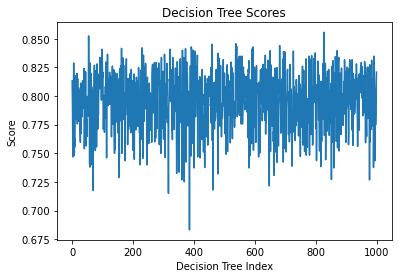

In [37]:
from sklearn.datasets import make_moons
from sklearn.model_selection import ShuffleSplit, train_test_split
from sklearn.tree import DecisionTreeClassifier

# Get make moons dataset
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)
X, y

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


# Use shuffle split to create 1000 training sets of 100 samples each
rs = ShuffleSplit(n_splits=1000, train_size=100, random_state=42)

decision_trees = []
decision_tree_scores = []

# Create subsets, decision trees, scores
for train_index, _ in rs.split(X_train, y_train):
    X_train_temp= X[train_index]
    y_train_temp = y[train_index]

    tree_clf = DecisionTreeClassifier(max_depth= 50, max_leaf_nodes= 21, min_samples_split= 2)
    tree_clf.fit(X_train_temp, y_train_temp)

    decision_trees.append(tree_clf)
    decision_tree_scores.append(tree_clf.score(X_test, y_test))


print(f"Best Decision Tree Index: {decision_tree_scores.index(max(decision_tree_scores))}")
print(f"Best Decision Tree Score: {max(decision_tree_scores)}")
print(f"Worst Decision Tree Index: {decision_tree_scores.index(min(decision_tree_scores))}")
print(f"Worst Decision Tree Score: {min(decision_tree_scores)}")
print(f"Average Decision Tree Score: {sum(decision_tree_scores) / len(decision_tree_scores)}")

plt.plot(decision_tree_scores)
plt.title('Decision Tree Scores')
plt.xlabel('Decision Tree Index')
plt.ylabel('Score')
plt.show();

In [38]:
from scipy.stats import mode

In [51]:
from sklearn.metrics import accuracy_score, f1_score

In [52]:
def get_score():
    y_preds = []
    for test_index in range(len(X_test)):
        X_test_val = X_test[test_index]
        # y_test_val = y_test[test_index]
        predictions = []

        for tree in decision_trees:
            predictions.append(tree.predict([X_test_val]))

        # find most frequent using scipy mode
        prediction = mode(predictions, axis=0)[0][0]

        # Append most frequent prediction to y_preds
        y_preds.append(prediction)
    
    return accuracy_score(y_test, y_preds), f1_score(y_test, y_preds)
        

In [53]:
get_score()

(0.8692, 0.868621936520691)